In [10]:
import pandas as pd
import numpy as np

In [11]:
from collections import Counter

In [12]:
video_li = pd.read_csv('./blackpink/video_l.csv', sep='|', encoding = 'utf-8')
mag_li = pd.read_csv('./magazine/final/mag_lisa_adfn_2.csv', encoding = 'utf-8', sep = '|')

In [13]:
video_li['magazine'] = 'YOUTUBE'
video_li['brand'] = 'YOUTUBE'
video_li['word_lisa'] = video_li['contents']

In [14]:
mag_li = mag_li[['magazine', 'brand', 'title', 'word_lisa']]

In [15]:
video_li = video_li[['magazine', 'brand', 'title', 'word_lisa']]

In [16]:
tot_li = pd.concat([video_li, mag_li])

In [17]:
tot_li.reset_index(drop=True, inplace = True)

In [18]:
tot_li.to_csv('./magazine/final/mag-video_l.csv', sep='|', encoding = 'utf-8', index = False)

In [19]:
tot_li[tot_li['word_lisa'].isnull()]

,magazine,brand,title,word_lisa
111,FN,L,"로제, 생로랑 홍보대사!블랙핑크 멤버 모두 럭셔리 브랜드 싹쓸이",NaN
140,FN,L,"로제, 생로랑 홍보대사!블랙핑크 멤버 모두 럭셔리 브랜드 싹쓸이",NaN


In [20]:
tot_li.drop([111, 140], inplace = True)

In [21]:
tot_li.reset_index(drop=True, inplace = True)

In [61]:
import re
 
text = u'This dog \U0001f602'
print(text) # with emoji
 
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
print(emoji_pattern.sub(r'', text)) # no emoji

This dog 😂
This dog 


In [62]:
tot_li['word_lisa'] = tot_li['word_lisa'].str.replace(emoji_pattern, '').str.replace('♥', '').str.replace('❤️', '').str.replace('❤', '')

In [63]:
tot_li['word_lisa']

0      ['Yorumlada turk cok gördum ve selamlar verıyo...
1      ['나는 당신을 사랑합니다, 나의 햇살.너 굉장하다.사랑해너는 내가 사는 이유야나는...
2      ['너는 너무 아름다워!', '얜 공주병', '항상 좋은 음악을 줘서 고마워요!',...
3      ['리사 isnt just a star. She is the brightest st...
4      ['당신은 바비와 같습니다! 리사♡', '사랑해요.', '이것은 항상 불공평하다. ...
                             ...                        
192    밀란 패션위크 참석차 출국한 리사의 공항 룩., BLACKPINK 리사가 오늘 2월...
193    , , 리사의 패션 브랜드가 탄생할 것으로 보인다.  YG엔터테인먼트가 2019년 ...
194    서로의 팬임을 인증한 두 스타, 8월 28일 BLACKPINK와 세레나 고메즈가 함...
195    내셔널 아이스크림 데이’를 기념한 BLACKPINK의 귀여운 포스팅., 제니와 리사...
196    한국 신진 디자이너부터 하이 패션 브랜드까지 섭렵한 블핑, 6월 26일 드디어 BL...
Name: word_lisa, Length: 197, dtype: object

## list(article_list) 생성 후 append

In [64]:

article_list = []
for word in tot_li['word_lisa']:
    article_list.append(word)

In [65]:
len(article_list)

197

In [66]:
article_list[6]

"['Congratulate on 리사!!! So, I uploaded beatboxing remix 뚜두뚜두 for BLACKPINK! Hope you like it!! We love BLACKPINK!!(´∇｀)', '어째서 BLACKPINK는 댓글을 달지 않았어', '리사, 당신은 훌륭 해요. 당신은 확실히 메인 댄서가 될 자격이 있습니다.', '0:51 그를 잡았 기 때문에 나는 해커가 아닙니다', '비율보소~~와우🤩', '공주님 사랑 해요', '진짜 졸라 말랐네', '안녕이 노래는 내가 첫 노래에서 sds를들은 첫 노래 🥺 사랑 BLACKPINK 동의', '리사가 한국 산업에 적응하기가 너무 힘들지만 그녀는 여전히 관리하고 있습니다.', '춤 천재', '리사누나 나~죽어~~', '어머 리사아아..', '사랑해 내 소원은 ', '언제나처럼 끔찍한', '리사 너무 좋은 당신의 모든', '바비인형 리사누나 ♡', '미친 허리 실화냐', '스타리 모스트', '리사 는 가장 큰', '리사 ♡', '진짜 얼굴 소멸하기 1초전이네', '비율봐라 180이라고 누가 그러면 믿겠네 ...', '마네킹몸매가 현존해 ..... 신기해 ......', '진짜 오진다 오져...', '리사 ️️️️️️️️사랑']"

## 트위터 패키지 안에 konlpy 모듈 호출

In [67]:
from konlpy.tag import Twitter

In [68]:
twitter = Twitter()

C:\Users\wnsgo\anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


### 각 문장별로 형태소 구분하기

In [69]:
sentences_tag = []

for sentence in article_list:
    morph = twitter.pos(sentence)
    sentences_tag.append(morph)
    
    

print(len(sentences_tag))


197


In [70]:
sentences_tag[0]

[("['", 'Punctuation'),
 ('Yorumlada', 'Alpha'),
 ('turk', 'Alpha'),
 ('cok', 'Alpha'),
 ('g', 'Alpha'),
 ('ö', 'Foreign'),
 ('rdum', 'Alpha'),
 ('ve', 'Alpha'),
 ('selamlar', 'Alpha'),
 ('ver', 'Alpha'),
 ('ı', 'Foreign'),
 ('yorum', 'Alpha'),
 ('한국어', 'Noun'),
 ('깜박임', 'Noun'),
 ("',", 'Punctuation'),
 ("'", 'Punctuation'),
 ('다시', 'Noun'),
 ('봐도', 'Verb'),
 ('넘', 'Verb'),
 ('멋있당', 'Adjective'),
 ("..',", 'Punctuation'),
 ("'", 'Punctuation'),
 ('리사', 'Noun'),
 ('BLACKPINK', 'Alpha'),
 ("',", 'Punctuation'),
 ("'", 'Punctuation'),
 ('나', 'Noun'),
 ('난', 'Josa'),
 ('니', 'Noun'),
 ('ㄷ', 'KoreanParticle'),
 ('ㅅ', 'KoreanParticle'),
 ('닺내애', 'Noun'),
 ('ㅣ', 'KoreanParticle'),
 ('ㄷㅎㅊ', 'KoreanParticle'),
 ('ㅈ', 'KoreanParticle'),
 ('휸', 'Noun'),
 ('도', 'Noun'),
 ('ㄴ', 'KoreanParticle'),
 (',', 'Punctuation'),
 ('잳재넬', 'Noun'),
 ('ㅈ', 'KoreanParticle'),
 ('래댇', 'Noun'),
 (',', 'Punctuation'),
 ('댜', 'Noun'),
 ('종', 'Noun'),
 ('ㅁ', 'KoreanParticle'),
 ('댲', 'Noun'),
 ('지', 'Verb'),
 ('ㅜ', '

In [71]:
twitter.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

### stopword 추가

In [72]:
sw_df = pd.read_csv('stopwords.csv', header=None)

In [73]:
sw_df.columns = ['stopword']

In [74]:
stop_words = []
for sw in sw_df['stopword']:
    stop_words.append(sw)

In [75]:
print(len(stop_words))
print(type(stop_words))

675
<class 'list'>


In [76]:
stop_words[-10:]

['둘', '셋', '넷', '다섯', '여섯', '일곱', '여덟', '아홉', '령', '영']

In [77]:
add_0 = []
for w in add_0:
    stop_words.append(w)

In [78]:
len(stop_words)

675

### 1. 명사 혹은 형용사인 품사만 선별해 리스트에 담기

In [79]:
noun_adj_list= []
for sentence1 in sentences_tag:
    for word, tag in sentence1:
        if tag in ['Noun', 'Adjective', 'Alpha', 'Determiner', 'Foreign', 'Verb']:
            if not word in stop_words:
                noun_adj_list.append(word)

In [80]:
len(noun_adj_list)

72498

In [81]:
noun_adj_list[:20]

['Yorumlada',
 'turk',
 'cok',
 'g',
 'ö',
 'rdum',
 've',
 'selamlar',
 'ver',
 'ı',
 'yorum',
 '한국어',
 '깜박임',
 '다시',
 '봐도',
 '넘',
 '멋있당',
 '리사',
 'BLACKPINK',
 '니']

In [82]:
noun_adj_list[:10]

['Yorumlada', 'turk', 'cok', 'g', 'ö', 'rdum', 've', 'selamlar', 'ver', 'ı']

In [83]:
ADFN_list= []
for sentence1 in sentences_tag:
    words = []
    for word, tag in sentence1:
        if tag in ['Adjective', 'Determiner','Foreign','Noun', 'Alpha', 'Verb']:
            if word not in stop_words:
                words.append(word)
    ADFN_list.append(words)

In [84]:
len(ADFN_list)

197

In [85]:
ADFN_list[0]

['Yorumlada',
 'turk',
 'cok',
 'g',
 'ö',
 'rdum',
 've',
 'selamlar',
 'ver',
 'ı',
 'yorum',
 '한국어',
 '깜박임',
 '다시',
 '봐도',
 '넘',
 '멋있당',
 '리사',
 'BLACKPINK',
 '니',
 '닺내애',
 '휸',
 '도',
 '잳재넬',
 '래댇',
 '댜',
 '종',
 '댲',
 '지',
 '√®',
 'T',
 'ü',
 'm',
 'Turk',
 'ı',
 'sh',
 'bl',
 'ı',
 'nk',
 'lovesickgirl',
 'aks',
 'ı',
 'n',
 'yar',
 'ışı',
 'kazanmal',
 'ı',
 'y',
 'ı',
 'zzz',
 '터키어',
 '깜박임',
 '사랑',
 '말랐네',
 '갈비뼈',
 '보인다',
 '채널',
 '구독',
 '해주세요',
 '등록',
 '하신',
 '어머니',
 '만',
 '달러',
 '벌고',
 '평생',
 '행복하길',
 '바랍니다',
 'BLACKPINK',
 'ILOVE',
 'YOU',
 '리사',
 '해',
 '요',
 '♡♡',
 '멋있다',
 '매력',
 '넘치는',
 '리사',
 '넘',
 '예쁘다',
 '요',
 '🤩',
 '와우',
 '리사',
 '완벽한',
 '브라보',
 'Wawww',
 'cloths',
 '리사',
 '사랑',
 '하나님',
 '매우',
 '달콤하고',
 '사랑',
 '합니다',
 '깜빡',
 '아니며',
 '사랑',
 '합니다',
 '와우',
 '리사',
 '멋있다',
 '아름다워',
 '미쳤지',
 '않고',
 '내',
 '사랑',
 '알',
 '됩니다',
 '아닙니다',
 '내',
 '인생',
 '세상',
 '가장',
 '좋은',
 '소녀',
 '입니다',
 '사랑',
 '합니다',
 '햇살',
 '굉장하다',
 '사랑',
 '해',
 '내',
 '사는',
 '이유',
 '존재',
 '대해',
 '매우',
 '감사합니다',
 '솔직

In [86]:
tot_li['ADFN'] = ADFN_list

### 선별된 품사별 빈도수 계산 & 상위 빈도 10위까지 출력

In [87]:
word = Counter(noun_adj_list)
print(word.most_common(200))

[('리사', 3570), ('진짜', 1258), ('BLACKPINK', 867), ('예쁘다', 676), ('귀엽다', 543), ('춤', 478), ('해', 418), ('제니', 349), ('거', 342), ('사랑', 319), ('존나', 313), ('하는', 309), ('랩', 275), ('개', 271), ('한국', 255), ('더', 251), ('사람', 247), ('영어', 247), ('말', 242), ('내', 235), ('할', 235), ('노래', 223), ('멤버', 212), ('잘', 206), ('한', 206), ('영상', 197), ('얼굴', 195), ('무대', 192), ('지수', 191), ('했다', 189), ('뭐', 181), ('아이돌', 178), ('애', 174), ('매력', 172), ('태국', 170), ('넘', 168), ('수', 166), ('언니', 157), ('한국어', 155), ('중국', 153), ('정말', 152), ('그냥', 146), ('한국인', 145), ('보고', 142), ('사진', 141), ('패션', 139), ('있는', 136), ('생각', 134), ('로제', 133), ('표정', 132), ('비율', 131), ('멋있다', 129), ('전소민', 129), ('댓글', 126), ('실력', 124), ('느낌', 123), ('공유', 121), ('임', 118), ('외국인', 117), ('하고', 113), ('모습', 113), ('보면', 112), ('정도', 109), ('팬', 107), ('는', 104), ('역시', 103), ('걸', 102), ('발음', 101), ('여자', 100), ('해서', 100), ('중', 100), ('블랙', 98), ('난', 98), ('안', 98), ('같은', 98), ('요', 96), ('완전', 96), ('양세찬', 96

In [88]:
# # 한 글자인 단어는 제외

# for i, v in enumerate(noun_adj_list):
#     if len(v)<2:
#         noun_adj_list.pop(i)

In [89]:
count = Counter(noun_adj_list)

In [90]:
word_list = count.most_common(200)
for v in word_list:
    print(v)

('리사', 3570)
('진짜', 1258)
('BLACKPINK', 867)
('예쁘다', 676)
('귀엽다', 543)
('춤', 478)
('해', 418)
('제니', 349)
('거', 342)
('사랑', 319)
('존나', 313)
('하는', 309)
('랩', 275)
('개', 271)
('한국', 255)
('더', 251)
('사람', 247)
('영어', 247)
('말', 242)
('내', 235)
('할', 235)
('노래', 223)
('멤버', 212)
('잘', 206)
('한', 206)
('영상', 197)
('얼굴', 195)
('무대', 192)
('지수', 191)
('했다', 189)
('뭐', 181)
('아이돌', 178)
('애', 174)
('매력', 172)
('태국', 170)
('넘', 168)
('수', 166)
('언니', 157)
('한국어', 155)
('중국', 153)
('정말', 152)
('그냥', 146)
('한국인', 145)
('보고', 142)
('사진', 141)
('패션', 139)
('있는', 136)
('생각', 134)
('로제', 133)
('표정', 132)
('비율', 131)
('멋있다', 129)
('전소민', 129)
('댓글', 126)
('실력', 124)
('느낌', 123)
('공유', 121)
('임', 118)
('외국인', 117)
('하고', 113)
('모습', 113)
('보면', 112)
('정도', 109)
('팬', 107)
('는', 104)
('역시', 103)
('걸', 102)
('발음', 101)
('여자', 100)
('해서', 100)
('중', 100)
('블랙', 98)
('난', 98)
('안', 98)
('같은', 98)
('요', 96)
('완전', 96)
('양세찬', 96)
('입니다', 93)
('눈', 93)
('머리', 92)
('데', 92)
('최고', 90)
('하면', 90)
('하는거', 90)

## 워드클라우드 만들기

In [91]:

import matplotlib.pyplot as plt

### 패키지 설치 및 폰트 어쩌구

In [92]:
import matplotlib.font_manager as fm

# 이용 가능한 폰트 중 '고딕'만 선별
for font in fm.fontManager.ttflist:
    if 'Gothic' in font.name:
        print(font.name, font.fname)

Malgun Gothic C:\WINDOWS\Fonts\malgun.ttf
Yu Gothic C:\WINDOWS\Fonts\YuGothB.ttc
HYGothic-Extra C:\WINDOWS\Fonts\H2GTRE.TTF
Franklin Gothic Medium C:\WINDOWS\Fonts\framdit.ttf
Malgun Gothic C:\Windows\Fonts\malgunbd.ttf
Yu Gothic C:\Windows\Fonts\YuGothL.ttc
Century Gothic C:\Windows\Fonts\GOTHIC.TTF
Yu Gothic C:\Windows\Fonts\YuGothM.ttc
Yu Gothic C:\WINDOWS\Fonts\YuGothR.ttc
MS Gothic C:\WINDOWS\Fonts\msgothic.ttc
HYGothic-Medium C:\WINDOWS\Fonts\H2GTRM.TTF
Malgun Gothic C:\WINDOWS\Fonts\malgunsl.ttf
Century Gothic C:\Windows\Fonts\GOTHICI.TTF
Century Gothic C:\WINDOWS\Fonts\GOTHICBI.TTF
Century Gothic C:\Windows\Fonts\GOTHICB.TTF
Franklin Gothic Medium C:\WINDOWS\Fonts\framd.ttf


In [93]:
font_path = 'C:\WINDOWS\Fonts\malgun.ttf'

### wordcloud 그리기

In [94]:
from wordcloud import WordCloud

In [95]:
wc = WordCloud(font_path=font_path, background_color="white", width=600, height=400)

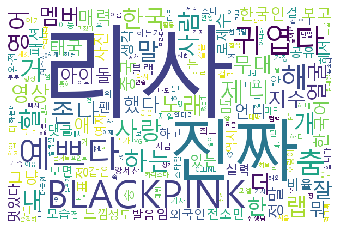

In [96]:
wc.generate_from_frequencies(dict(word_list))

plt.imshow(wc) 
plt.axis('off') 
plt.show()


wc.to_file('tot_lisa_adj_twitter.png')

In [97]:
tot_li.to_csv('./magazine/final/video_lisa_adfn.csv', sep='|', index = False, encoding = 'utf-8')

In [98]:
lisatop200 = pd.DataFrame(word_list)

In [99]:
lisatop200.columns = ['word', 'count']

In [100]:
lisatop200

,word,count
0,리사,3570
1,진짜,1258
2,BLACKPINK,867
3,예쁘다,676
4,귀엽다,543
...,...,...
195,화보,47
196,민,47
197,분위기,46
198,공개,46


In [60]:
lisatop200.to_csv('./magazine/final/lisatop200.csv', sep='|', encoding = 'utf-8', index = False)